# General Process

**Background:**

An airline wants to increase its revenue, by improving services in every part of it. In order to be right on target, which parts must be improved, the company is looking for what factors affect the level of customer satisfaction.

**Goals**

From these factors, a model will be created to predict customer satisfaction. So the hope is that by being able to predict customer satisfaction, the company can determine the right steps to improve service in order to attract more customers thereby increasing revenue.


## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

**Dataset Origin**

The data was obtained from the DigitalSkola datascience bootcamp as a final project.

**Dataset Overview:**

*  *Customer Type*: is the type of customer/passenger loyal or disloyal?
*  *Class*: type of cabin class whether economy, economy plus, or business class.
*  *Gender*: gender (male or female).
*  *Age*: the age of the passenger.
*  *Type of Travel*: the type of trip whether business or personal.
*  *Flight Distance*: flight mileage.
*  *Checkin Service*: service when checking in with a score of 0 - 5.
*  *Departure Delay in Minutes*: departure delay in minutes.
*  *Arrival Delay in Minutes*: arrival delay in minutes.
*  *Satisfaction*: passenger satisfaction (satisfied or dissatisfied)


Feature '*satisfaction*' will be our target variable.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Final Project/Dataset7_Airline_Satisfaction.csv')
#df = pd.read_csv('Dataset7_Airline_Satisfaction.csv')

In [4]:
df.sample(10).style.background_gradient(cmap='Dark2_r')

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
67253,Loyal Customer,Eco,Male,44,Business travel,2649,4,0,0.000000,dissatisfied
52071,disloyal Customer,Eco,Female,26,Business travel,1588,4,21,22.000000,dissatisfied
56089,disloyal Customer,Business,Male,27,Business travel,1621,5,0,0.000000,dissatisfied
52079,disloyal Customer,Eco,Male,26,Business travel,1685,3,0,0.000000,dissatisfied
101054,Loyal Customer,Business,Female,57,Business travel,429,3,0,0.000000,satisfied
110897,Loyal Customer,Business,Male,40,Business travel,383,1,0,24.000000,satisfied
19568,Loyal Customer,Business,Female,52,Personal Travel,350,4,6,16.000000,satisfied
112515,Loyal Customer,Business,Male,58,Business travel,3817,4,24,17.000000,satisfied
113492,Loyal Customer,Business,Female,36,Business travel,3644,4,0,0.000000,satisfied
54376,disloyal Customer,Eco,Female,36,Business travel,1120,3,0,3.000000,dissatisfied


# Exploratory Data Analysist

## Data Validation

### Check data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer Type               129880 non-null  object 
 1   Class                       129880 non-null  object 
 2   Gender                      129880 non-null  object 
 3   Age                         129880 non-null  int64  
 4   Type of Travel              129880 non-null  object 
 5   Flight Distance             129880 non-null  int64  
 6   Checkin service             129880 non-null  int64  
 7   Departure Delay in Minutes  129880 non-null  int64  
 8   Arrival Delay in Minutes    129487 non-null  float64
 9   satisfaction                129880 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 9.9+ MB


Notes:

*   Our dataset consists of 129880 rows and 10 columns.
*   float(1), int(4), object(5)
*   Column 'Checkin service' seems to be an object, so we'll change it to type object




In [6]:
df['Checkin service'] = df['Checkin service'].astype(str)

### Data inconsistent

Homogenize Data (For data with object type)

In [7]:
cols = df.columns

for i in cols:
  if df[i].dtypes == object :
    before = df[i].unique()
    df[i]=df[i].str.lower()
    print(f'Unique values columns {i} before : {before} --> after homogenize : {df[i].unique()}  \n')


Unique values columns Customer Type before : ['Loyal Customer' 'disloyal Customer'] --> after homogenize : ['loyal customer' 'disloyal customer']  

Unique values columns Class before : ['Eco' 'Business' 'Eco Plus'] --> after homogenize : ['eco' 'business' 'eco plus']  

Unique values columns Gender before : ['Female' 'Male'] --> after homogenize : ['female' 'male']  

Unique values columns Type of Travel before : ['Personal Travel' 'Business travel'] --> after homogenize : ['personal travel' 'business travel']  

Unique values columns Checkin service before : ['5' '2' '4' '3' '1' '0'] --> after homogenize : ['5' '2' '4' '3' '1' '0']  

Unique values columns satisfaction before : ['satisfied' 'dissatisfied'] --> after homogenize : ['satisfied' 'dissatisfied']  



### Missing Value (Null & NA)

In [8]:
df.isna().sum()

Customer Type                   0
Class                           0
Gender                          0
Age                             0
Type of Travel                  0
Flight Distance                 0
Checkin service                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      393
satisfaction                    0
dtype: int64

Notes : Arrival Delay in Minutes has 393 missing value (NA)

In [9]:
med = df['Arrival Delay in Minutes'].median()
df.fillna(med, inplace=True)
df.isna().sum()

Customer Type                 0
Class                         0
Gender                        0
Age                           0
Type of Travel                0
Flight Distance               0
Checkin service               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

## Data Visualization

In [10]:
# Countplot function to perform Univariate analysis
def plotUnivariate(datax):
  Total = len(df[datax])
  ax = sns.countplot(x = datax, data = df, palette = 'mako')
  ax.set_facecolor('#faf9f4')
  #plt.rcParams['font.size'] = '14'
  for p in ax.patches:
      percentage = f'{100 * p.get_height() / Total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      
      ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11)

  ax.set_xlabel(datax, fontsize=14)
  ax.set_ylabel('Count',fontsize=14)
  plt.title(f'{datax} Distribution', fontsize=14)

In [11]:
# Countplot function to perform Bivariate analysis
def plotBivariate(datax,datay):
  Total = len(df[datax])
  ax = sns.countplot(x = datax, data = df, hue= datay, palette = 'mako')
  ax.set_facecolor('#faf9f4')
  #plt.rcParams['font.size'] = '14'
  for p in ax.patches:
      percentage = f'{100 * p.get_height() / Total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      
      ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11)

  ax.set_xlabel(datax, fontsize=14)
  ax.set_ylabel('Count',fontsize=14)
  plt.title(f'{datax} Vs {datay}', fontsize=14)

### Univariate Analysist

#### Categorical

In [12]:
df.describe(include='object').T

,count,unique,top,freq
Customer Type,129880,2,loyal customer,106100
Class,129880,3,business,62160
Gender,129880,2,female,65899
Type of Travel,129880,2,business travel,89693
Checkin service,129880,6,4,36481
satisfaction,129880,2,satisfied,71087


loyal customer       106100
disloyal customer     23780
Name: Customer Type, dtype: int64 + 

business    62160
eco         58309
eco plus     9411
Name: Class, dtype: int64 + 

female    65899
male      63981
Name: Gender, dtype: int64 + 

business travel    89693
personal travel    40187
Name: Type of Travel, dtype: int64 + 

4    36481
3    35538
5    27005
2    15486
1    15369
0        1
Name: Checkin service, dtype: int64 + 

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64 + 



<function matplotlib.pyplot.show(close=None, block=None)>

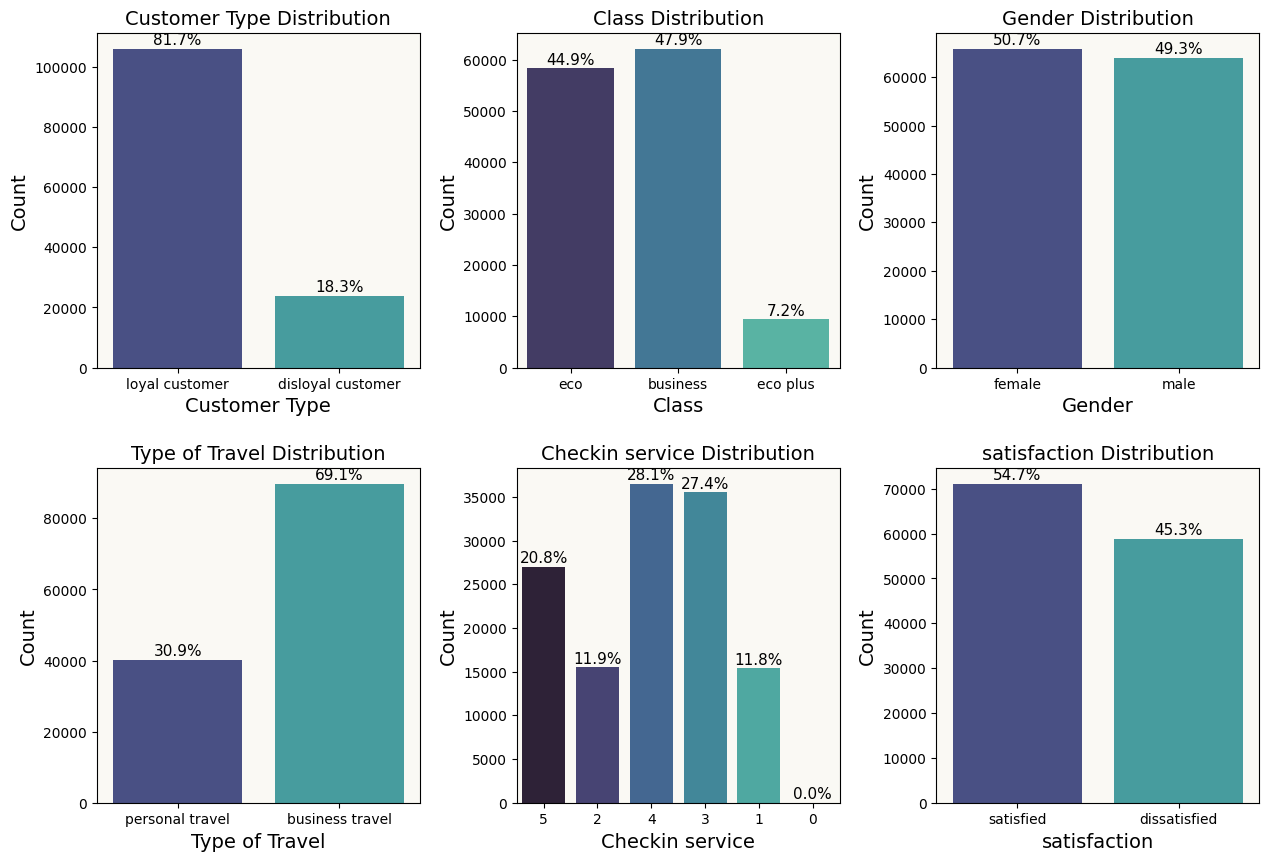

In [13]:
cols = df.columns
col_obj = []
for i in cols:
  if df[i].dtypes == object :
    print(f'{df[i].value_counts()} + \n')
    col_obj.append(i)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(col_obj):
    ax = plt.subplot(2, 3, n + 1)
    plotUnivariate(col)

plt.show

Notes : 
*    There is a significant difference between satisfied and dissatisfied passengers around 12.294.
*    As we can see, the number of men and women is almost the same, there are only slight differences.
*    There is a very big difference, where the number of loyal customers is far more than disloyal.
*    The number of Business Travel is much more than Personal Travel. That means we work more with Customers at the Business Layer.
*    Customers prefer business or economy class over economy plus class
*  Most passengers give a value of 3-5 for check-in services. This means that passengers are quite satisfied with the check-in service.

#### Numeric

In [14]:
df.describe().applymap('{0:.0f}'.format)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880
mean,39,1981,15,15
std,15,1027,38,38
min,7,50,0,0
25%,27,1359,0,0
50%,40,1925,0,0
75%,51,2544,12,13
max,85,6951,1592,1584


Text(0.5, 1.0, 'Distribution of Age')

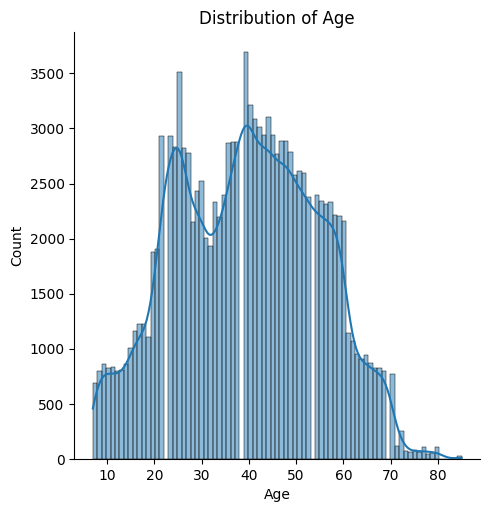

In [15]:
sns.displot(data = df['Age'], palette='mako', kde=True, height = 5)
plt.title('Distribution of Age')

Notes : 

*  The average age of passengers is around 39 years
*  Only a few children were passengers
*  Most of the passengers are between 24 - 54 years old



Text(0.5, 1.0, 'Distribution of Flight Distance')

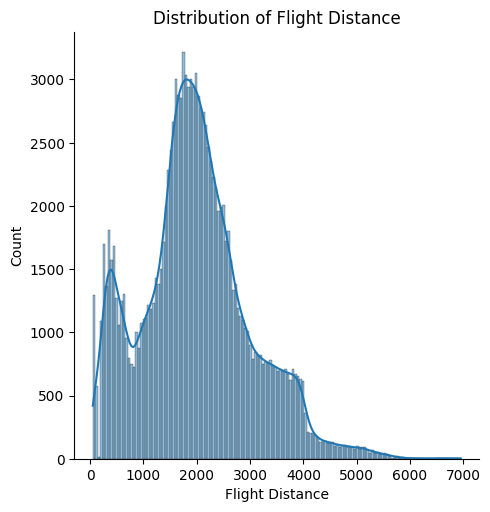

In [16]:
sns.displot(data = df['Flight Distance'], palette='mako', kde=True, height = 5)
plt.title('Distribution of Flight Distance')

Notes:

*   Average of flight distances is 1981 km. That means we don't spend a lot of time in the air.
*   From the diagram above shows the most frequent flights with a range of 1000 - 3000 km



In [17]:
df[['Age','Flight Distance']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,-0.003606,-0.719140
Flight Distance,0.466748,0.364306


Notes : 

*   Age has a skew of less than 0, the distribution is slightly negative or skewed to the left, which means the mean < median.
*   Flight Distance has a skew of more than 0, the distribution tends to be positive or skewed to the right, which means the mean > median.
*   All of them have a kurtosis of less than 3, which is called platykurtic, which means they tend to produce fewer and less extreme outliers than the normal distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

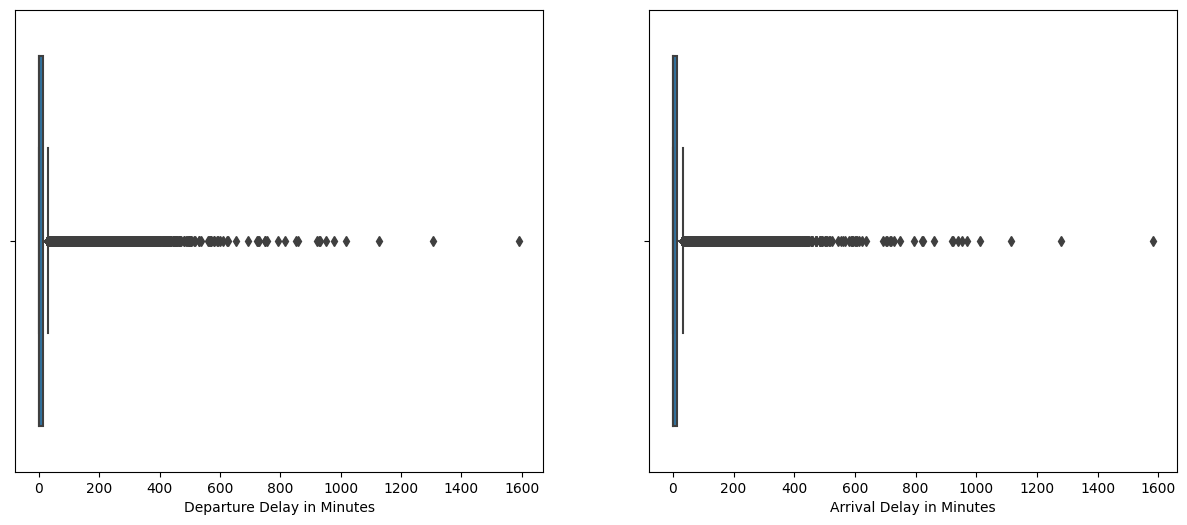

In [18]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=df["Departure Delay in Minutes"])
plt.subplot(1,2,2)
sns.boxplot(x=df["Arrival Delay in Minutes"])

plt.show

Notes : 

*   Average of Departure Delay is 14 Minutes, and Arrival Delays about 15 minutes.

*   Between arrival and departure delays have a similar boxplot diagram, meaning that these two features have a significant correlation. Any delay in departure will cause a delay in arrival

### Bivariate Analysist

#### Predictor Variable VS Target Variable

##### Categorical

<function matplotlib.pyplot.show(close=None, block=None)>

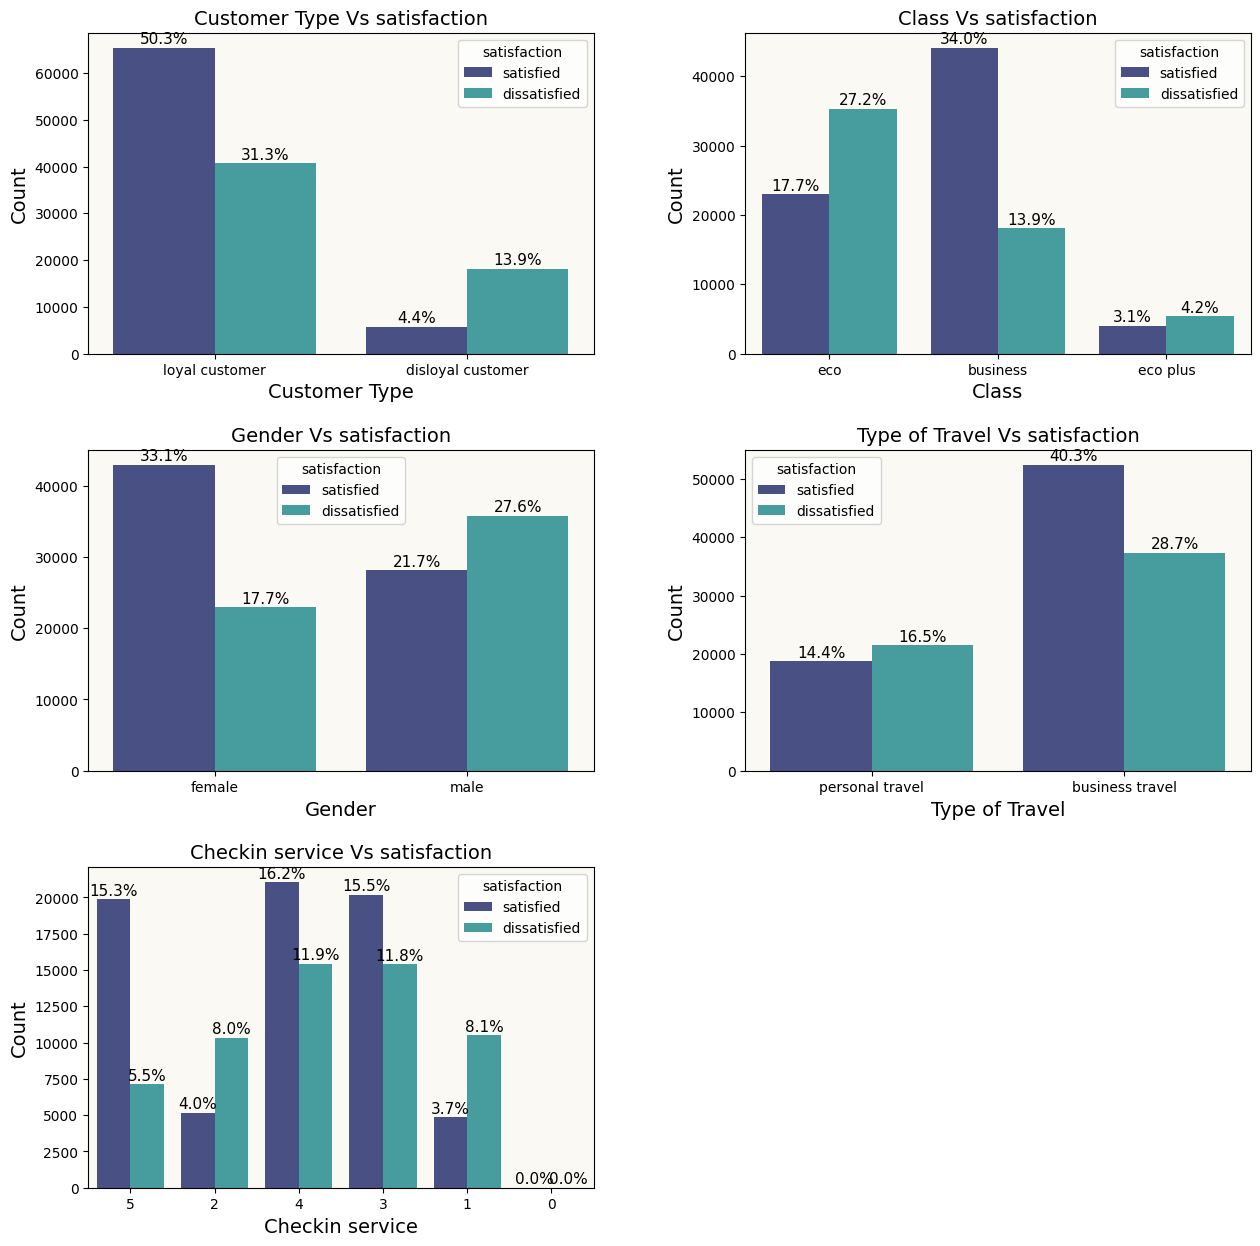

In [19]:
cols = ['Customer Type','Class','Gender','Type of Travel','Checkin service']

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    plotBivariate(col,'satisfaction')

plt.show

Notes : 

*   It can be seen that Disloyal Customers have more dissatisfaction and it makes sense because they are not loyal customers.
But in Loyal Customers also have more dissatisfaction and it becomes a problem. We must know the cause of this problem occurs.
*   For flights with economy class, more passengers are dissatisfied. We have to find out what causes it.
*   Flights with business class, the average passenger is satisfied.
*   For female passengers, they are more satisfied with their flights, in contrast to men who are dissatisfied.
*   We're not good at Personal Travel because there are more dissatisfied customers than satisfied customers.  That could explain why there are more Business Travel than Personal.
*   In Business Travel, there are more satisfied than dissatisfied customers and that's good, very good, but still the number of dissatisfied customers is not small. So we have to find out what causes it.
*   Checkin service with a score below 3 on average feels dissatisfied while a score above 3 feels satisfied

##### Numeric

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

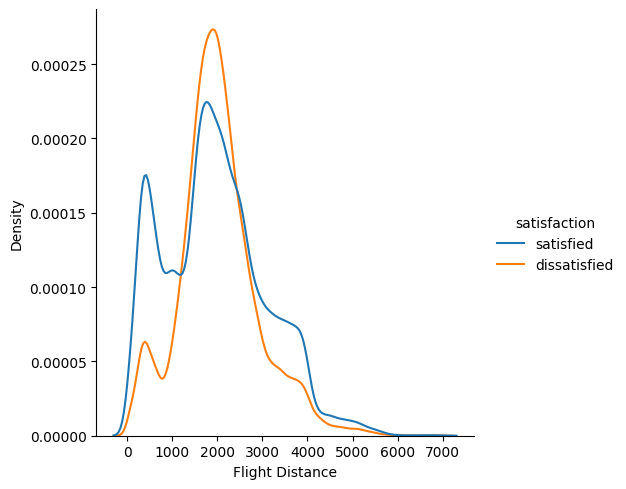

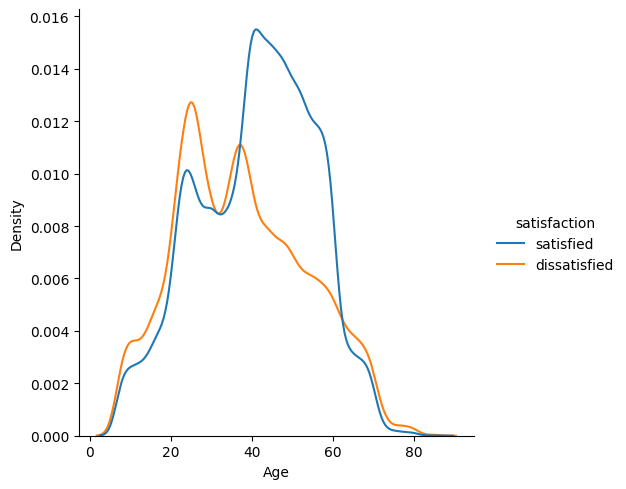

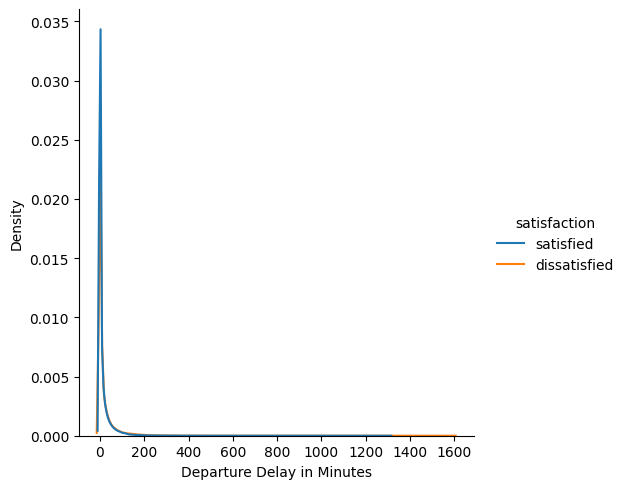

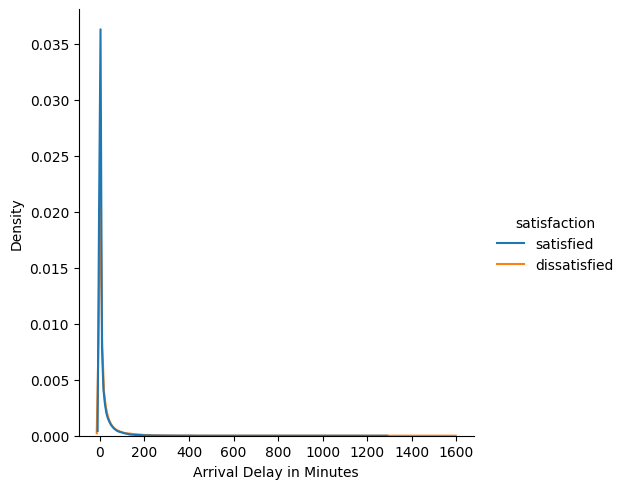

In [20]:
col =['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']
plt.figure(figsize=(10,10))
for i in col:
  sns.displot(df,x=i, hue="satisfaction", kind="kde")
plt.show

Notes :

*   For flight distances < 1300 most passengers are satisfied. 
*   Flights distance 1300 - 2500 most passengers are dissatisfied. 
*   And if the flight distance > 2500, the passengers are satisfied.
*   Passengers aged < 40 years are more dissatisfied, although not too significant. 
*   But if the age of 40 - 60 years significantly satisfied. 
*   And if the age > 60 years most feel dissatisfied.
*   Delays in departure and arrival have the same pattern. Most of the delay occurs between 0 - 50 minutes. To see passenger satisfaction, we have to look at other features.



#### Other Variable VS Customer Type

##### Categorical

<function matplotlib.pyplot.show(close=None, block=None)>

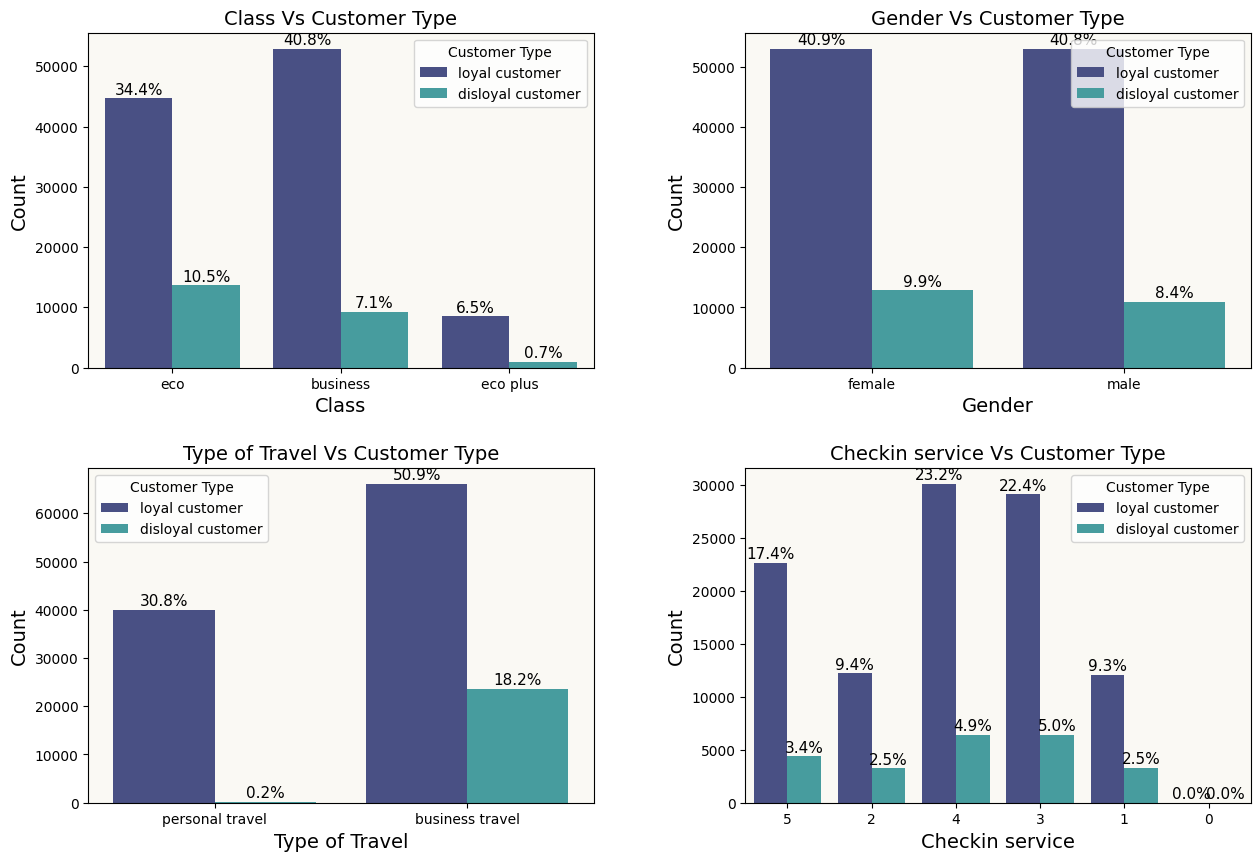

In [21]:
cols = ['Class','Gender','Type of Travel','Checkin service',]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)
    if n <= 3:
      plotBivariate(col,'Customer Type')
      
plt.show

##### Numeric

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

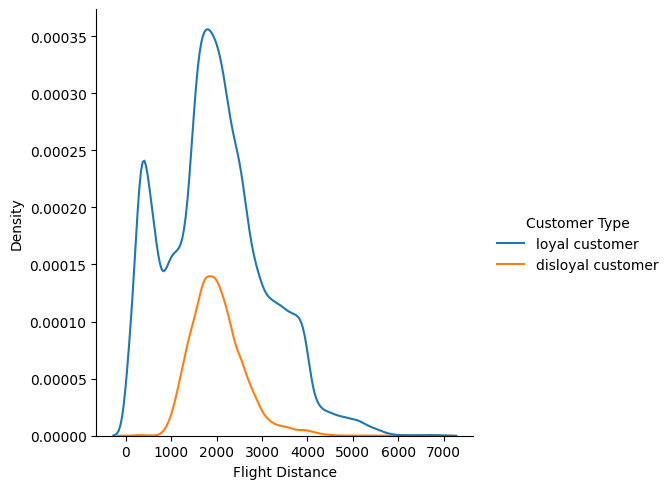

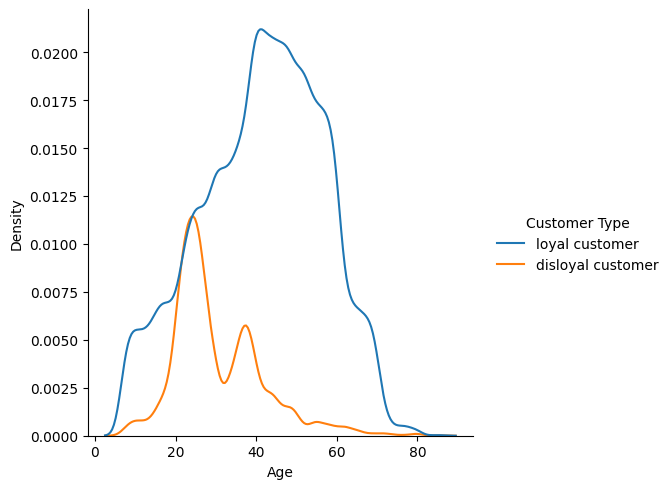

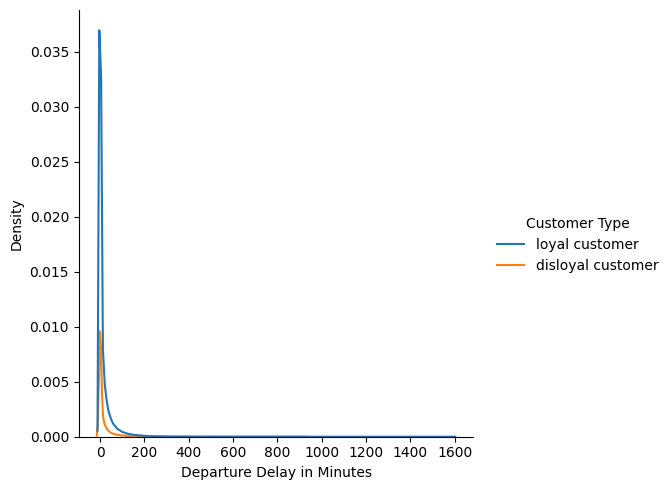

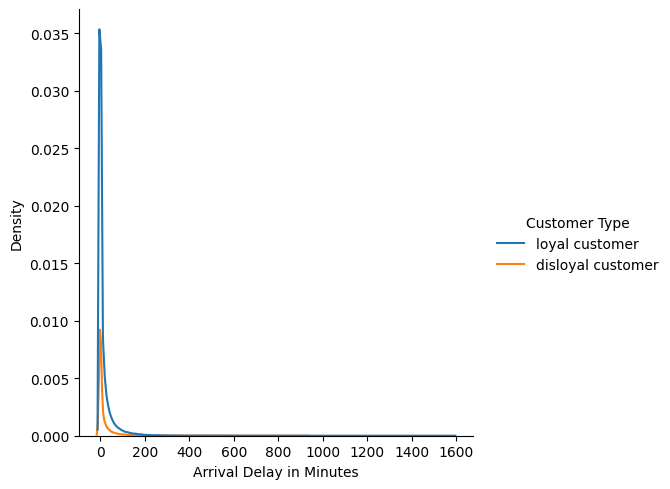

In [22]:
col =['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']
plt.figure(figsize=(10,10))
for i in col:
  sns.displot(df,x=i, hue="Customer Type", kind="kde")
plt.show

Notes : 

*   Loyal customers prefer business class for their flights, while disloyal customers prefer economy class. This is one of the reasons why in economy class there are many dissatisfied customers.
*   Both of them make more business travel than personal travel. Almost all disloyal customers do business travel.
*   For disloyal customers, flight distance does not affect the number of satisfied and dissatisfied is almost the same.
*   Meanwhile, loyal customers feel a little more satisfied for long-distance flights.
*   Loyal customers who feel dissatisfied are mostly felt by those under 40 years of age.
*   Both loyal and disloyal customer feel satisfy when delay is not beyond 12.5 Minutes.


#### Other Variable VS Class

##### Categorical

<function matplotlib.pyplot.show(close=None, block=None)>

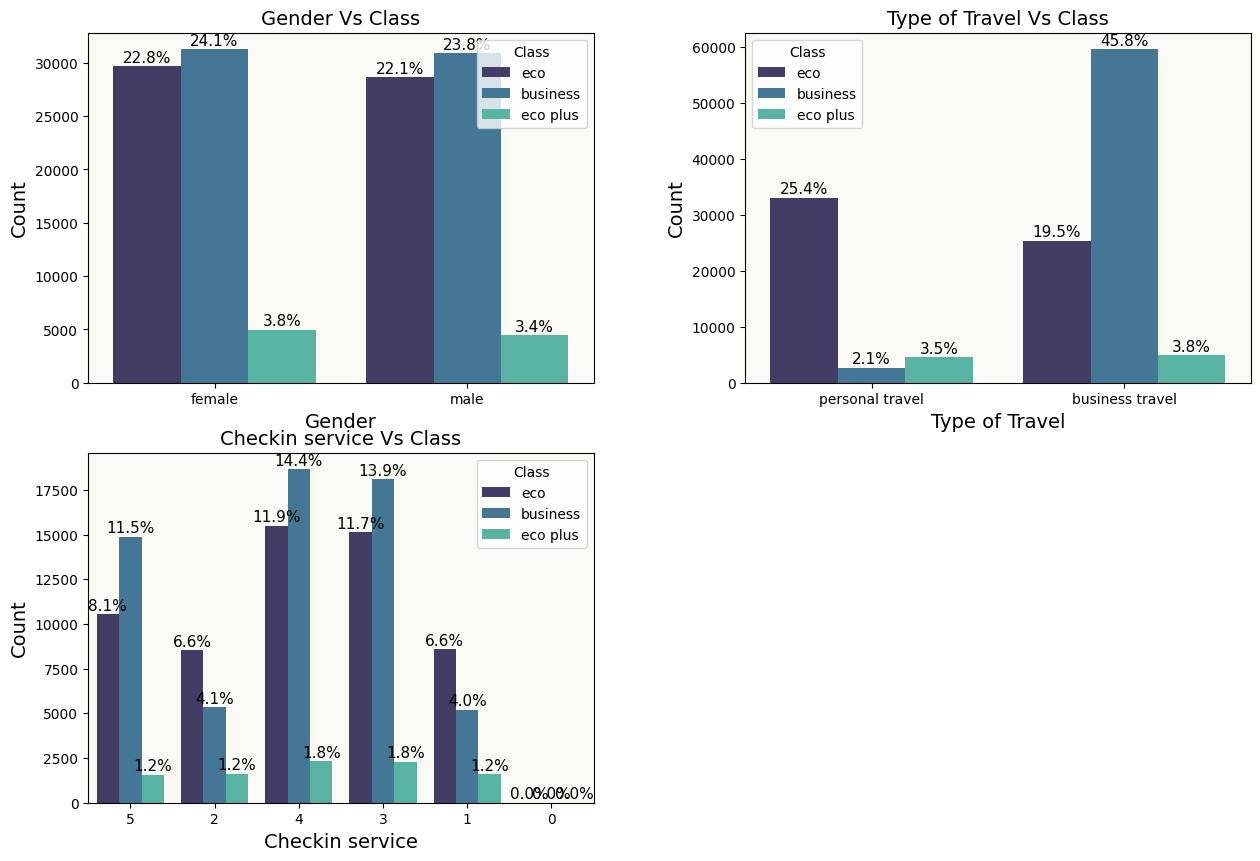

In [23]:
cols = ['Gender','Type of Travel','Checkin service']

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)
    if n <= 2:
      plotBivariate(col,'Class')

plt.show

Notes : 

*   There are still many customers with business travel who get economy class. This is the reason why many business travel customers are still dissatisfied. Business travel customers should get business class.


##### Numeric

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

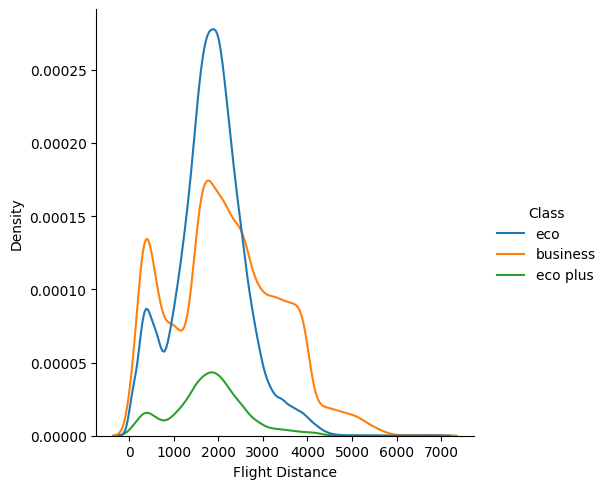

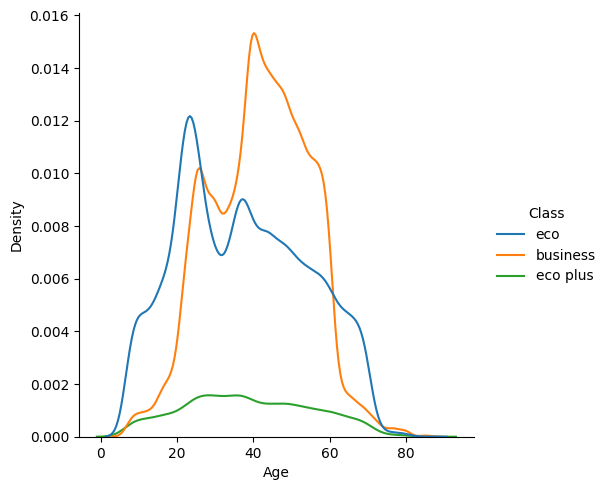

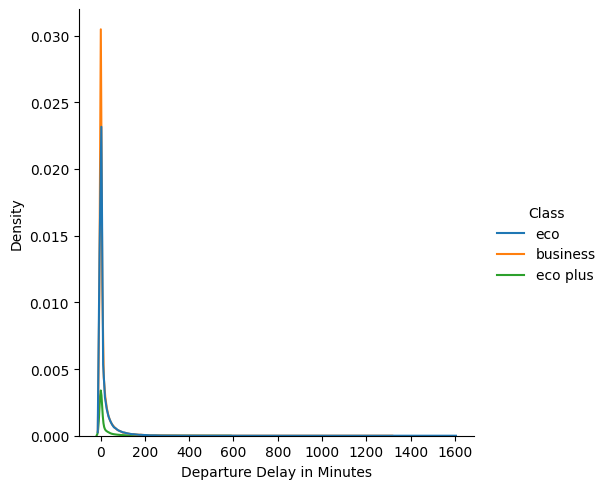

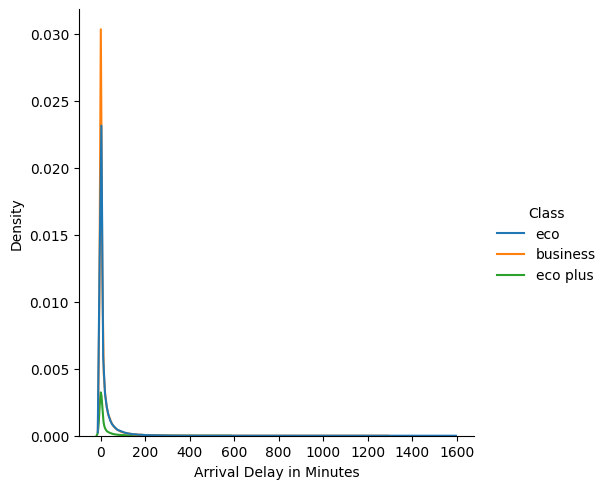

In [24]:
col =['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']
plt.figure(figsize=(10,10))
for i in col:
  sns.displot(df,x=i, hue="Class", kind="kde")
plt.show

Notes : 

*   Customers in economy class are vulnerable to feeling dissatisfied when flying long distances.
*   As long as the delay does not exceed 12.5 minutes, passengers in all classes are satisfied.

### Multivariat Analysis

For the purposes of multivariate analysis, the satisfaction feature is converted to numeric.

In [25]:
# For the purposes of multivariate analysis, the satisfaction feature is converted to numeric.
mapping_satisfaction = {'dissatisfied' : 0, 'satisfied' : 1}
df['satisfaction'] = df['satisfaction'].map(mapping_satisfaction)
df['satisfaction'] = df['satisfaction'].astype(int)

#### Categorical

##### Other Features vs Gender & Satisfaction

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x2000 with 0 Axes>

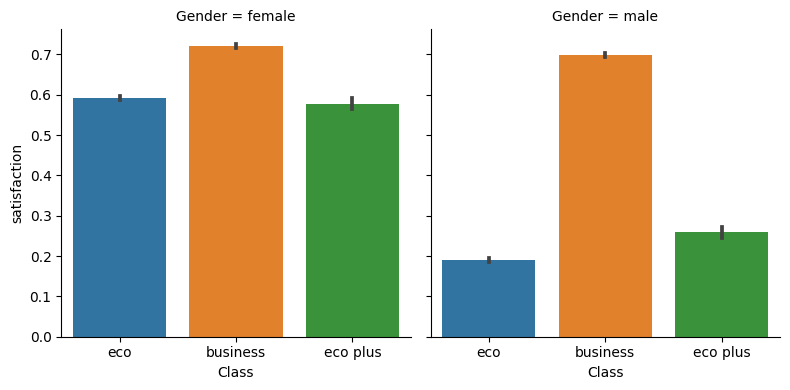

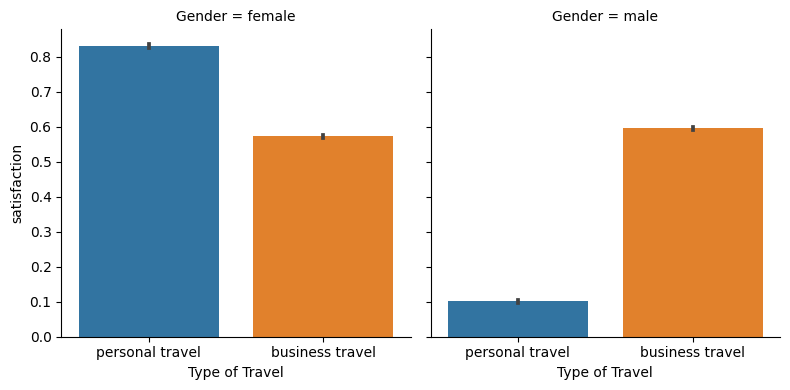

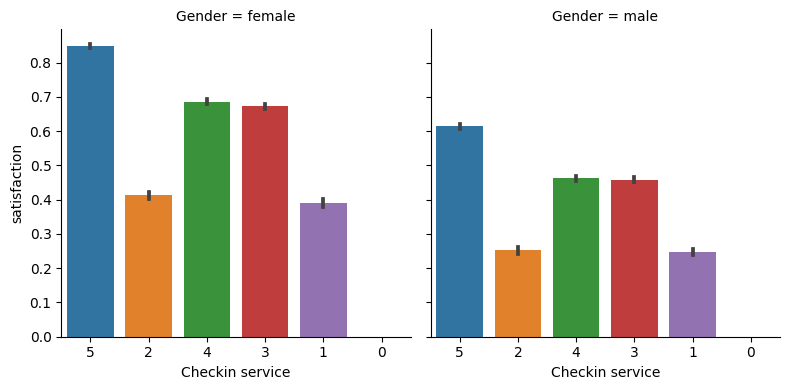

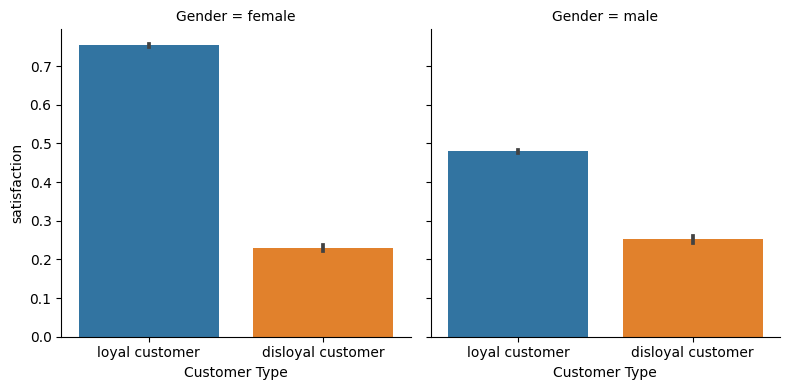

In [27]:
cols = ['Class','Type of Travel','Checkin service','Customer Type']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

for col in cols:
    sns.catplot(data=df, x=col, y="satisfaction", col="Gender",kind="bar", height=4)

plt.show

Notes:

*   The average woman is satisfied for each flight cabin class. On the other hand, men are only satisfied if they are in business class
*   Women prefer personal travel over business purposes, in contrast to men who prefer their travels for business.
*   Loyal customers of the female gender tend to be satisfied with their flights, in contrast to males who are more dissatisfied with their flights. Meanwhile, for disloyal customers, both male and frmale were equally dissatisfied.




##### Other Features vs Customer Type & Satisfaction

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x2000 with 0 Axes>

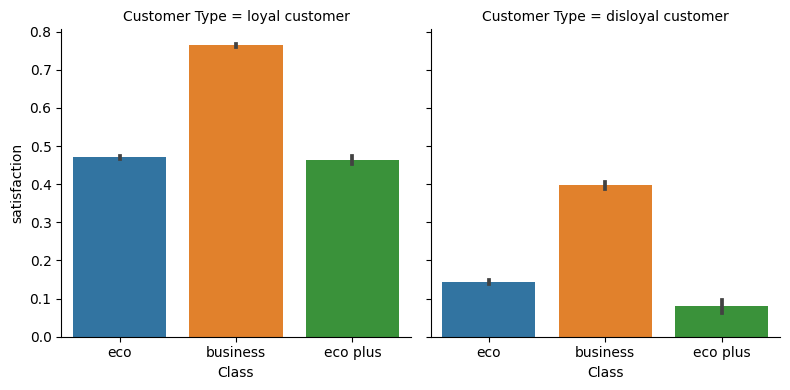

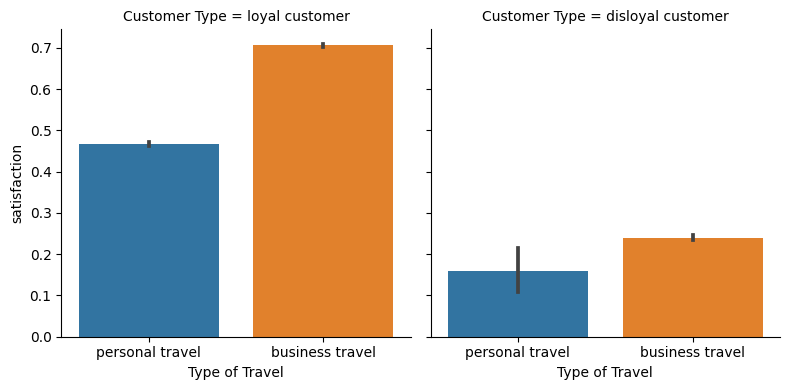

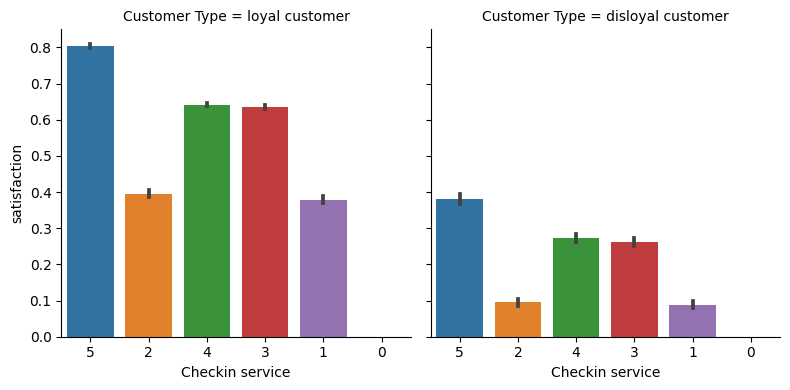

In [28]:
cols = ['Class','Type of Travel','Checkin service']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

for col in cols:
    sns.catplot(data=df, x=col, y="satisfaction", col="Customer Type",kind="bar", height=4)

plt.show

Notes:

*   Loyal customers tend to be satisfied if their flights are in business class and only some are satisfied if they are in economy class. Meanwhile, disloyal customers tend to feel dissatisfied when they are in any class.
*   Loyal customers who travel for business are mostly satisfied compared to those who travel for personal use.

##### Other Features vs Class & Satisfaction

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x2000 with 0 Axes>

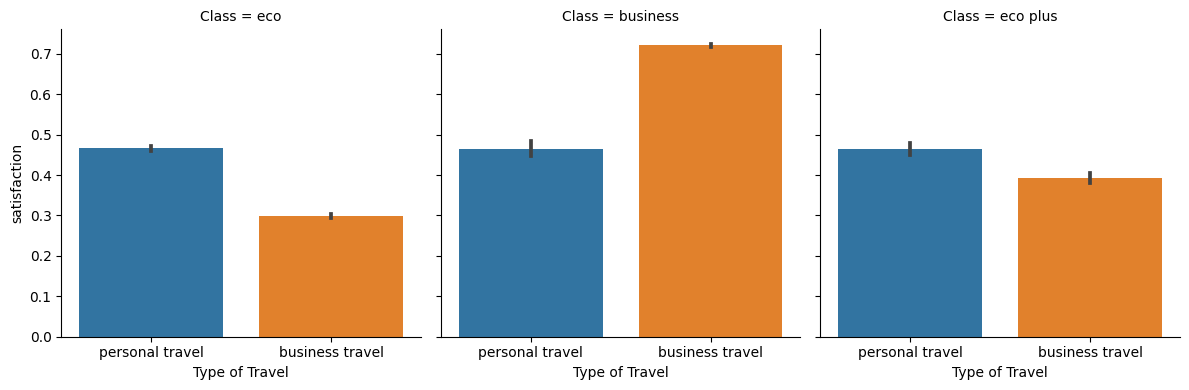

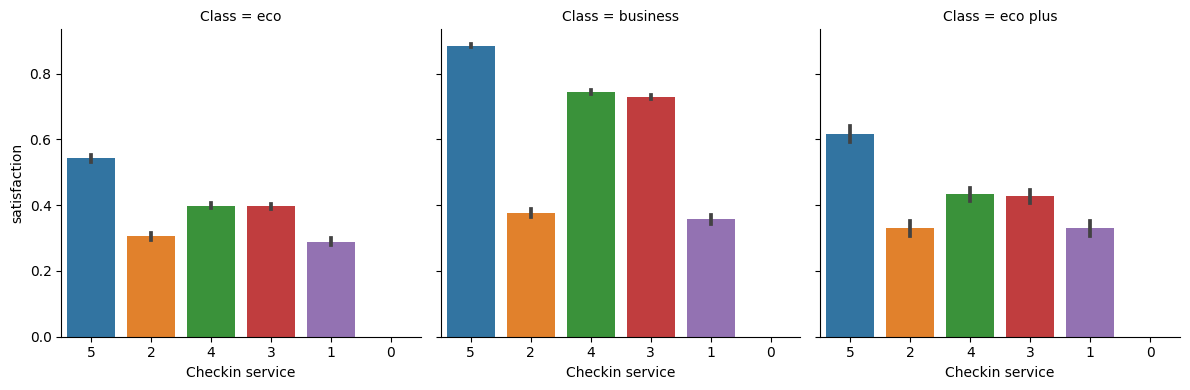

In [29]:
cols = ['Type of Travel','Checkin service']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

for col in cols:
    sns.catplot(data=df, x=col, y="satisfaction", col="Class",kind="bar", height=4)

plt.show

Notes:

*   Passengers traveling on business are satisfied if they use business class, and feel dissatisfied if they are in economy or economy plus class.
*   Passengers who take personal trips do not care about the cabin class they choose, tend to be balanced between satisfied and dissatisfied.



##### Other Features vs Type of Travel & Satisfaction

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x2000 with 0 Axes>

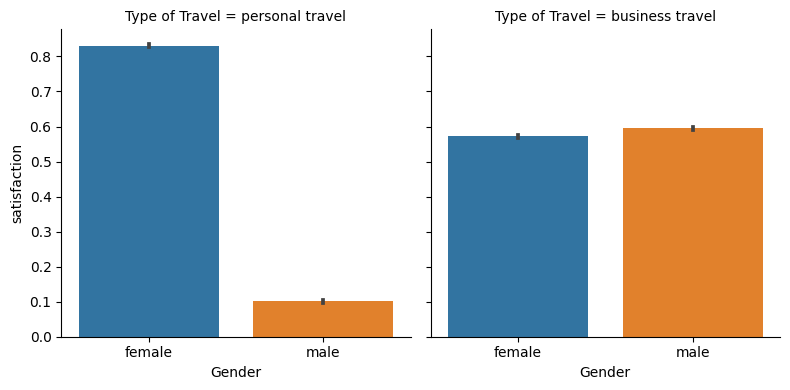

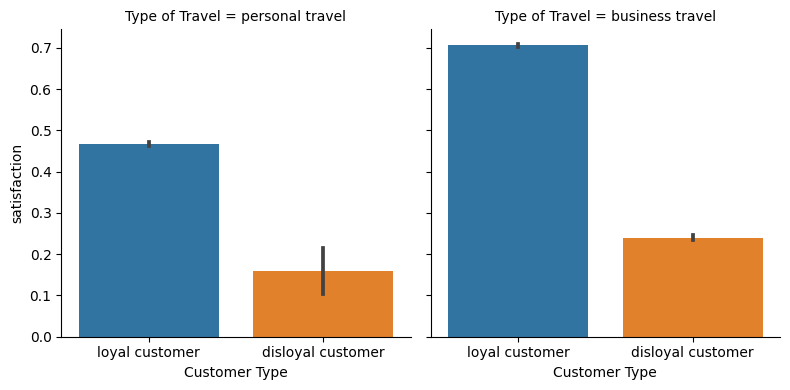

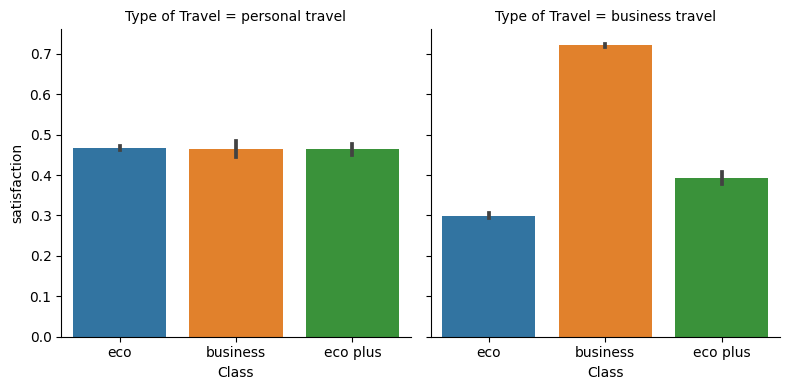

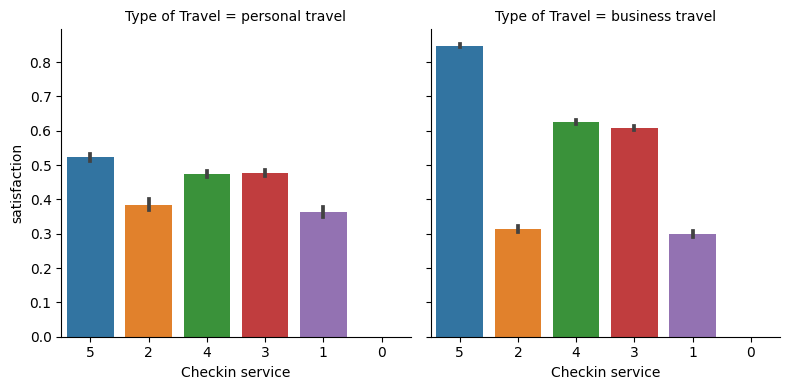

In [30]:
cols = ['Gender','Customer Type','Class','Checkin service']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

for col in cols:
    sns.catplot(data=df, x=col, y="satisfaction", col="Type of Travel",kind="bar", height=4)

plt.show

#### Numeric

<function matplotlib.pyplot.show(close=None, block=None)>

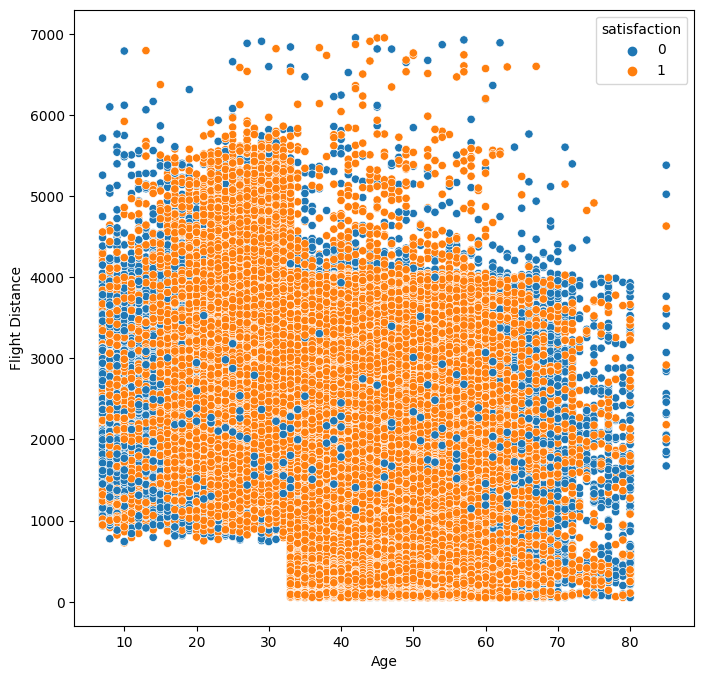

In [32]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Age', y="Flight Distance", hue="satisfaction")

plt.show

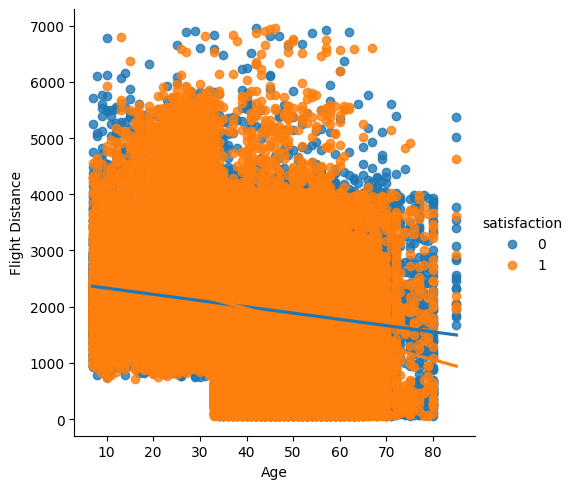

In [33]:
sns.lmplot(df, x="Age", y="Flight Distance", hue="satisfaction")

##### Pairplot

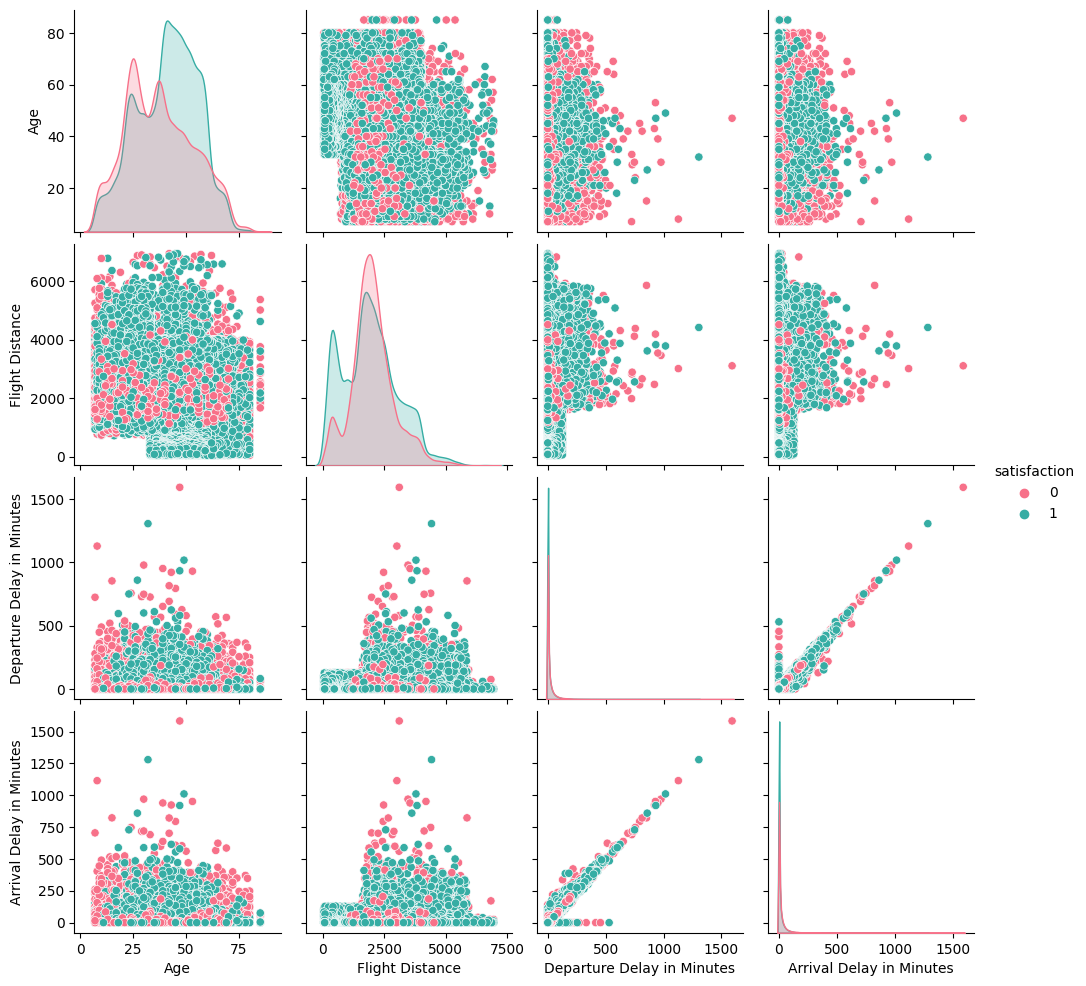

In [34]:
sns.pairplot(df, hue='satisfaction', palette='husl')

## Data Preprocessing

### Mapping categorical data into numeric (Label Encoder)

In [35]:
mapping_cust = {'loyal customer':1,'disloyal customer':0}
df['Customer Type'] = df['Customer Type'].map(mapping_cust)
df['Customer Type'] = df['Customer Type'].astype(int)

In [36]:
mapping_class = {'business':2,'eco':0,'eco plus':1}
df['Class'] = df['Class'].map(mapping_class)
df['Class'] = df['Class'].astype(int)

In [37]:
mapping_gender = {'male':0,'female':1}
df['Gender'] = df['Gender'].map(mapping_gender)
df['Gender'] = df['Gender'].astype(int)

In [38]:
mapping_type = {'personal travel':0,'business travel':1}
df['Type of Travel'] = df['Type of Travel'].map(mapping_type)
df['Type of Travel'] = df['Type of Travel'].astype(int)

In [39]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

### Separating independent variables  and dependent variable

In [40]:
X = df.drop(['satisfaction'],axis = 1)
y = df['satisfaction']

# Modeling

## Feature Selection

### Pearson Correlation

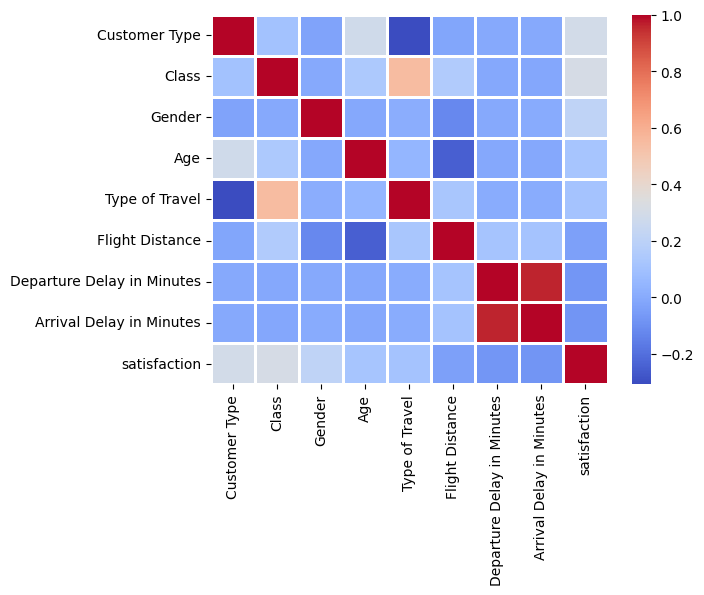

In [41]:
# Feature selection using Pearson Correlation
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=False, linewidth=2)

Notes :

*   The arrival and departure columns show a strong correlation or relationship between two or more independent variables (multicolinearity), so we can delete one of these columns.

In [42]:
correlation = (pd.DataFrame(abs(df.corr()).satisfaction))
correlation.sort_values(by='satisfaction', ascending=False).style.background_gradient(cmap='coolwarm_r')

,satisfaction
satisfaction,1.000000
Class,0.305535
Customer Type,0.292592
Gender,0.212236
Age,0.117971
Type of Travel,0.109239
Arrival Delay in Minutes,0.080487
Departure Delay in Minutes,0.073909
Flight Distance,0.039224


### KBest using F-test

In [43]:
# Feature Selection using F-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
clf = SelectKBest(f_classif, k=8)
clf = clf.fit(X, y)
clf.get_feature_names_out()

array(['Customer Type', 'Class', 'Gender', 'Age', 'Type of Travel',
       'Checkin service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

### Feature Selection using Ridge regression algorithm model 

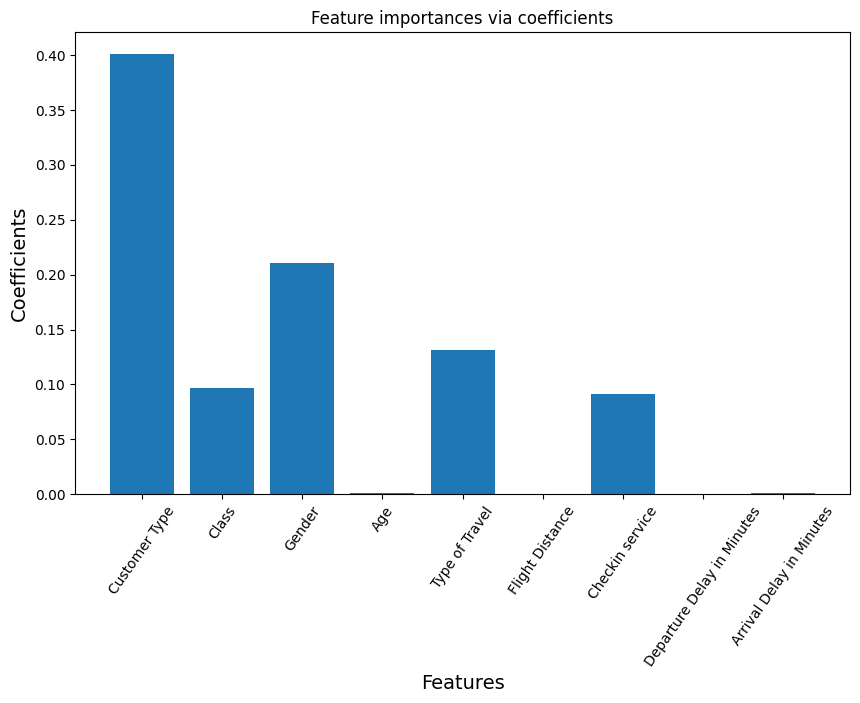

In [44]:
# Feature Selection using Ridge regression algorithm model 
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y) 
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

#ploting Feature importances vs coefficients
plt.figure(figsize=(10,6))
ax = plt.subplot()
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Coefficients',fontsize=14)
ax.tick_params(axis='x', rotation=55)

plt.show()

Notes :

*   From the three feature selection methods above, the results are not much different. The 3 features that don't matter much are Arrival Delay in Minutes, Departure Delay in Minutes, and Flight Distance.
*   Flight Distance being the least influential feature.
*   The arrival and departure columns show a strong correlation or relationship between two or more independent variables (multicolinearity), so we can delete one of these columns.
*   Therefore we will remove the flight distance and Departure Delay in Minutes.



In [45]:
# Remove 'Departure Delay in Minutes' to avoid multicollinearity
X.drop(['Departure Delay in Minutes'],axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Customer Type             129880 non-null  int64 
 1   Class                     129880 non-null  int64 
 2   Gender                    129880 non-null  int64 
 3   Age                       129880 non-null  int64 
 4   Type of Travel            129880 non-null  int64 
 5   Flight Distance           129880 non-null  int64 
 6   Checkin service           129880 non-null  object
 7   Arrival Delay in Minutes  129880 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 7.9+ MB


## Train Test Split

In [46]:
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size =0.1 , random_state=42 , stratify=y)

## Scaling

In [47]:
# Using Standard Scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# Save the scaler for later use when deploying the model
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

## Run All Model Training

In [48]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [49]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier(),
         'Bagging Classifier': BaggingClassifier(),
         'Boosting': AdaBoostClassifier(),
         'MLP': MLPClassifier(),
         'LDA': LinearDiscriminantAnalysis(),
         'QDA': QuadraticDiscriminantAnalysis()}

In [50]:
def fit_score(models, X_train, X_test, y_train, y_test):

    # Define the number of folds for cross-validation
    num_folds = 10

    # Split the dataset into folds
    kfold = KFold(n_splits=num_folds, shuffle=True)
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold, error_score='raise').mean()

    return model_scores

In [51]:
model_scores = fit_score(models,X_train_scaled,X_test_scaled,y_train,y_test)
model_scores

{'Logistic Regression': 0.7510351195486153,
 'KNN': 0.7945968151935378,
 'Decision Tree': 0.738331050644516,
 'Random Forest': 0.788907623809858,
 'Gradient Boosting Classifier': 0.8106799378035296,
 'Stochastic Gradien Descent': 0.7551415004828957,
 'Naive Bayes': 0.7182784271965461,
 'xgb Classifier': 0.8158043698970194,
 'Bagging Classifier': 0.7823032943682072,
 'Boosting': 0.7430877143089865,
 'MLP': 0.8152739866929061,
 'LDA': 0.7506331279852576,
 'QDA': 0.7803785182284442}

Notes :

*   XGB Classifier has the best accuracy among other models (0.816/ 81,6 %).

*   The accuracy obtained is quite good. So we can choose the XGB Classifier model as our prediction model.

<function matplotlib.pyplot.show(close=None, block=None)>

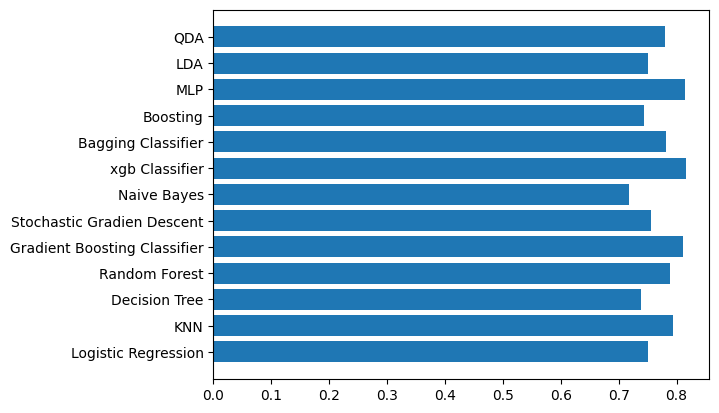

In [52]:
a = []
b = []
for i in model_scores:
  a.append(i)
  b.append(model_scores[i])

plt.barh(a,b)
plt.show

In [53]:
sco = pd.DataFrame({'Model':a, 'Score Accuracy': b})
sco.style.background_gradient(cmap='coolwarm')

,Model,Score Accuracy
0,Logistic Regression,0.751035
1,KNN,0.794597
2,Decision Tree,0.738331
3,Random Forest,0.788908
4,Gradient Boosting Classifier,0.810680
5,Stochastic Gradien Descent,0.755142
6,Naive Bayes,0.718278
7,xgb Classifier,0.815804
8,Bagging Classifier,0.782303
9,Boosting,0.743088


In [54]:
xgboost = XGBClassifier()
xgboost.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
MLP = MLPClassifier()
MLP.fit(X_train_scaled, y_train)

MLPClassifier()

### Save The best model using pickle

In [56]:
import pickle

# xgboost is our best model, therefore we keep this model for deployment purposes
pickle.dump(xgboost, open('xgboost.pkl','wb'))

## Model Evaluation

### Confusion Matrix Training for XGBoost & MLP

In [57]:
y_pred_train_xgb = xgboost.predict(X_train_scaled)

In [58]:
y_pred_train_mlp = MLP.predict(X_train_scaled)

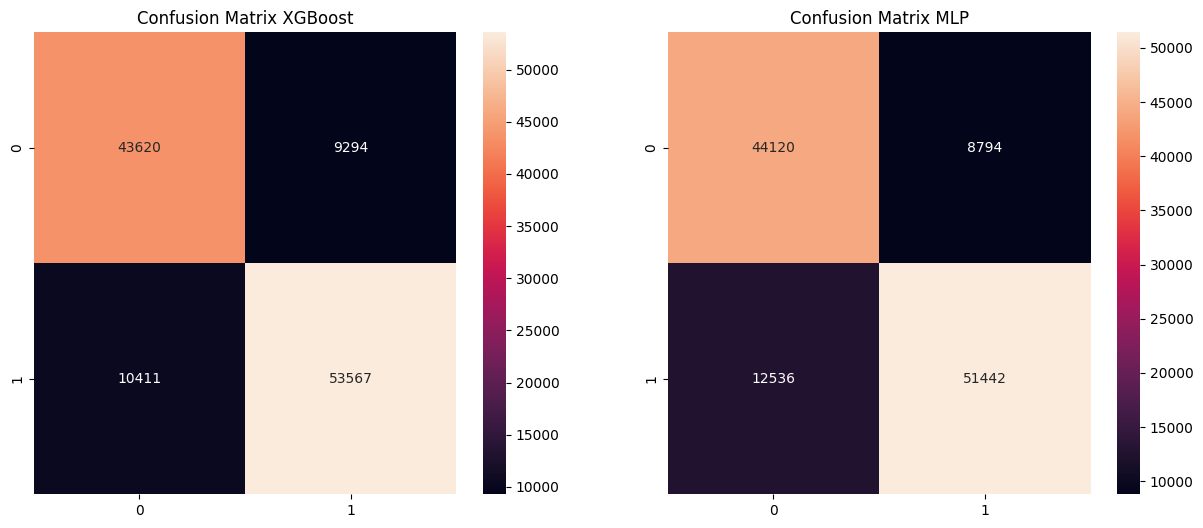

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(15,6))
ax =plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_train_xgb)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix XGBoost')

ax =plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_train_mlp)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix MLP')

plt.show()

In [60]:
print(classification_report(y_train, y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     52914
           1       0.85      0.84      0.84     63978

    accuracy                           0.83    116892
   macro avg       0.83      0.83      0.83    116892
weighted avg       0.83      0.83      0.83    116892



In [61]:
print(classification_report(y_train, y_pred_train_mlp))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81     52914
           1       0.85      0.80      0.83     63978

    accuracy                           0.82    116892
   macro avg       0.82      0.82      0.82    116892
weighted avg       0.82      0.82      0.82    116892



### Confusion Matrix Testing for XGBoost & MLP

In [62]:
y_pred_xgb = xgboost.predict(X_test_scaled)

In [63]:
y_pred_mlp = MLP.predict(X_test_scaled)

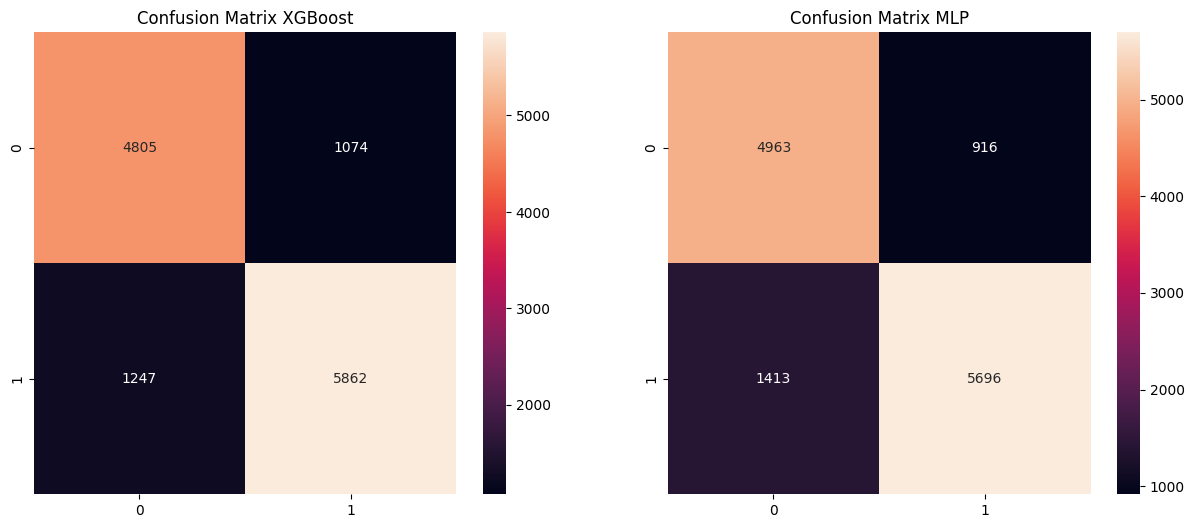

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(15,6))
ax =plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_xgb)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix XGBoost')

ax =plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_mlp)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix MLP')

plt.show()

### Classification Report For XGBoost 

In [65]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      5879
           1       0.85      0.82      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



### Classification Report For MLP

In [66]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      5879
           1       0.86      0.80      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



### ROC & AUC for XGBoost & MLP

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# XGBoost
xgb_probs = xgboost.predict_proba(X_test_scaled)
random_probs_xgb = [0 for _ in range(len(y_test))]

# MLP
mlp_probs = MLP.predict_proba(X_test_scaled)
random_probs_mlp = [0 for _ in range(len(y_test))]

In [68]:
xgb_probs = xgb_probs[:,1]
mlp_probs = mlp_probs[:,1]

In [69]:
# Calculate AUC for a random model
random_auc = roc_auc_score(y_test, random_probs_xgb)
 
# Calculate AUC for a XGBoost classifier
xgb_auc = roc_auc_score(y_test, xgb_probs)
# Calculate AUC for a MLP classifier
mlp_auc = roc_auc_score(y_test, mlp_probs)
 
# Show the result
print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('XGBoost : AUCROC = %.3f' % (xgb_auc))
print('MLP : AUCROC = %.3f' % (mlp_auc))

Random Prediction : AUCROC = 0.500
XGBoost : AUCROC = 0.897
MLP : AUCROC = 0.894


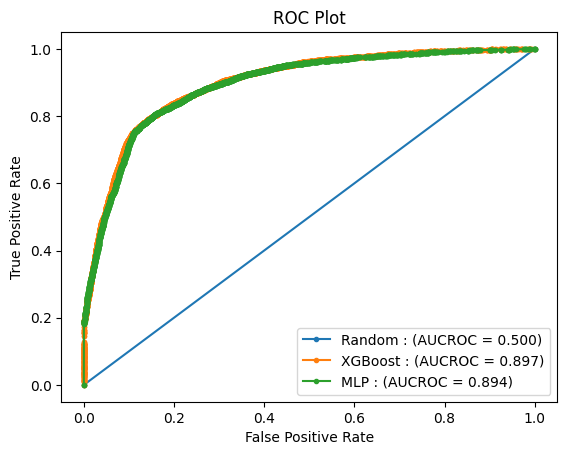

In [70]:
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate) for XGBoost
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs_xgb)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate) for MLP
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs_mlp)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
# Plot ROC curve
plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost : (AUCROC = %.3f)' % xgb_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP : (AUCROC = %.3f)' % mlp_auc)
 
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Notes:

Between XGBoost and MLP have almost the same AUC value. Both show pretty good model performance. Very little difference between the two models

# Hyperparameter Tuning

## Find the best estimator using cross validation

### Hyperparameter Tuning for XGBoost

In [71]:
np.random.seed(42)
params = {"n_estimators": [50,100,200, 300] ,
 'max_depth': [1,3,18],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' :[0,1],}


xg = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=params,
                                cv=4,
                                n_iter=100,
                                verbose=1,
                              refit=True,
                                n_jobs=-1
                               )

xg.fit(X_train_scaled, y_train)
xg.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


{'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 50,
 'max_depth': 18,
 'gamma': 9}

In [72]:
xg.best_score_

0.8179516134551551

In [73]:
model = XGBClassifier(reg_lambda = 1, reg_alpha = 1, n_estimators = 50, max_depth = 18, gamma = 9)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
y_pred_xgb_tun = model.predict(X_test_scaled)

### Hyperparameter Tuning for MLP

In [75]:
mlp = MLPClassifier(max_iter=100)

In [76]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [77]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [78]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.809 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.816 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.811 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.815 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.809 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.814 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

In [81]:
mlp = MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', solver='adam' )
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50),
              learning_rate='adaptive')

In [82]:
y_pred_mlp_tun = mlp.predict(X_test_scaled)

In [80]:
clf.best_score_

0.8166341580262122

Notes:

After hyperparameter tuning, the results are not much different, XGboost is slightly better than MLP. The increase in accuracy score is not very significant.

### Model Evaluation After Tuning

#### Confusion Matrix after hyperparameter tuning

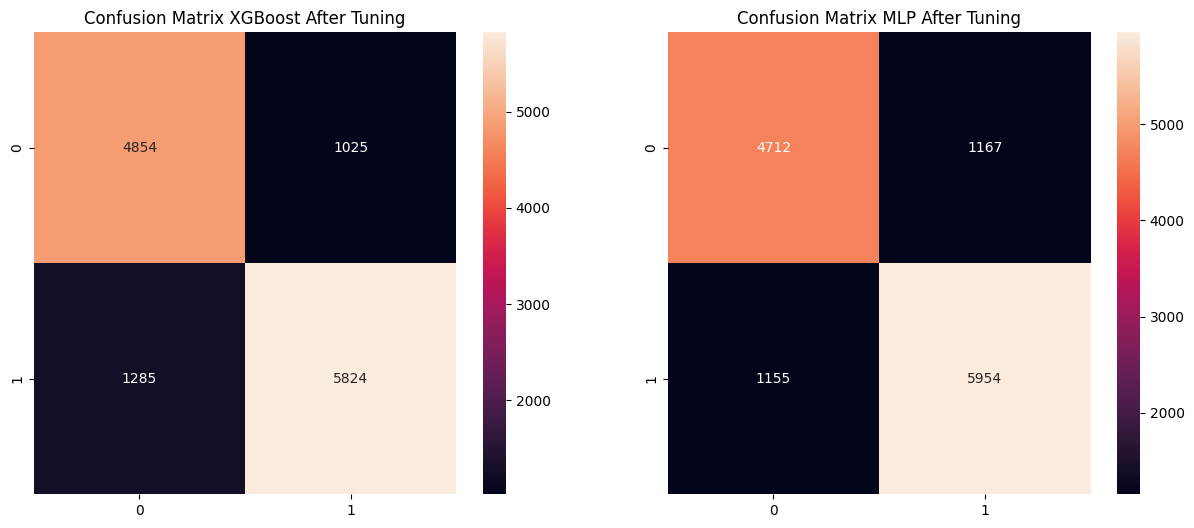

In [87]:
plt.figure(figsize=(15,6))
ax =plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_xgb_tun)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix XGBoost After Tuning')

ax =plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_mlp_tun)) , annot=True, fmt='.0f')
plt.title('Confusion Matrix MLP After Tuning')

plt.show()

#### Classification Report For XGBoost

In [88]:
print(classification_report(y_test, y_pred_xgb_tun))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5879
           1       0.85      0.82      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



#### Classification Report For MLP

In [89]:
print(classification_report(y_test, y_pred_mlp_tun))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5879
           1       0.84      0.84      0.84      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



#### ROC & AUC for XGBoost & MLP After Tuning

In [90]:
# XGBoost
xgb_probs_hpt = model.predict_proba(X_test_scaled)
random_probs = [0 for _ in range(len(y_test))]

# MLP
mlp_probs_hpt = mlp.predict_proba(X_test_scaled)
random_probs_mlp = [0 for _ in range(len(y_test))]

In [91]:
xgb_probs_hpt = xgb_probs_hpt[:,1]
mlp_probs_hpt = mlp_probs_hpt[:,1]

In [92]:
# Calculate AUC for a random model
random_auc = roc_auc_score(y_test, random_probs_xgb)
 
# Calculate AUC for a XGBoost classifier
xgb_auc_hpt = roc_auc_score(y_test, xgb_probs_hpt)
# Calculate AUC for a MLP classifier
mlp_auc_hpt = roc_auc_score(y_test, mlp_probs_hpt)
 
# Show the result
print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('XGBoost : AUCROC = %.3f' % (xgb_auc_hpt))
print('MLP : AUCROC = %.3f' % (mlp_auc_hpt))

Random Prediction : AUCROC = 0.500
XGBoost : AUCROC = 0.899
MLP : AUCROC = 0.895


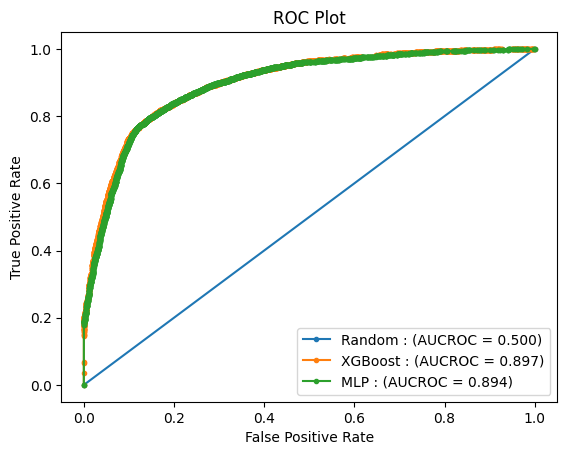

In [93]:
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate) for XGBoost
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs_hpt)
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate) for MLP
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs_mlp)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs_hpt)
# Plot ROC curve
plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost : (AUCROC = %.3f)' % xgb_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP : (AUCROC = %.3f)' % mlp_auc)
 
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Artificial Neural Network Using Tensorflow

In [94]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [95]:
Model=keras.Sequential([keras.layers.Dense(50,activation='relu')
                        ,keras.layers.Dense(100,activation='relu')
                        ,keras.layers.Dense(50,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])

In [96]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model.fit(X_train_scaled,y_train,epochs=128,batch_size=32,validation_split=0.1,callbacks=[callback],verbose=1)

Epoch 1/128
3288/3288 [==============================] - 9s 2ms/step - loss: 0.4392 - acc: 0.8020 - val_loss: 0.4221 - val_acc: 0.8135
Epoch 2/128
3288/3288 [==============================] - 6s 2ms/step - loss: 0.4216 - acc: 0.8109 - val_loss: 0.4137 - val_acc: 0.8169
Epoch 3/128
3288/3288 [==============================] - 8s 2ms/step - loss: 0.4168 - acc: 0.8132 - val_loss: 0.4104 - val_acc: 0.8183
Epoch 4/128
3288/3288 [==============================] - 6s 2ms/step - loss: 0.4134 - acc: 0.8141 - val_loss: 0.4109 - val_acc: 0.8168
Epoch 5/128
3288/3288 [==============================] - 8s 2ms/step - loss: 0.4120 - acc: 0.8140 - val_loss: 0.4081 - val_acc: 0.8176
Epoch 6/128
3288/3288 [==============================] - 7s 2ms/step - loss: 0.4107 - acc: 0.8148 - val_loss: 0.4065 - val_acc: 0.8189
Epoch 7/128
3288/3288 [==============================] - 8s 2ms/step - loss: 0.4093 - acc: 0.8155 - val_loss: 0.4061 - val_acc: 0.8170
Epoch 8/128
3288/3288 [==============================] 

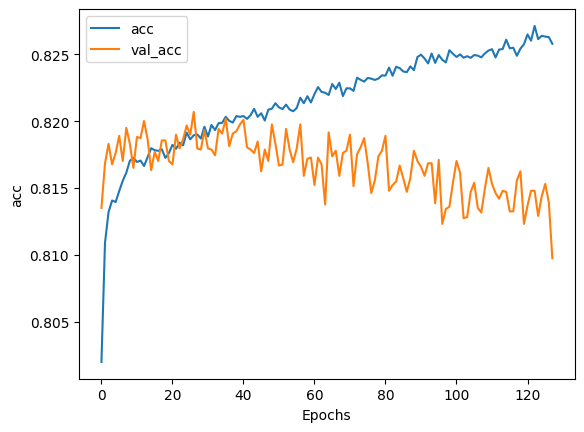

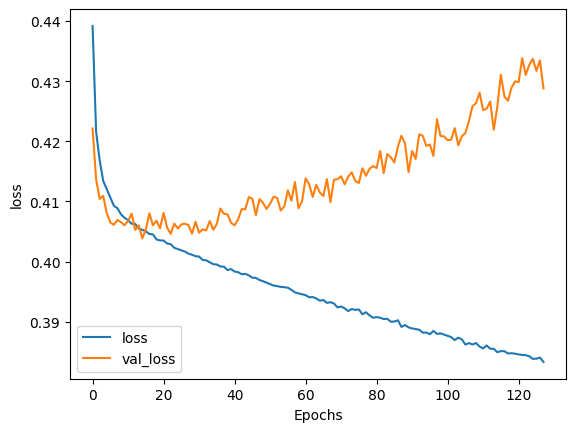

In [97]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [98]:
y_pred_deep=Model.predict(X_test_scaled)

406/406 [==============================] - 2s 4ms/step


<Axes: >

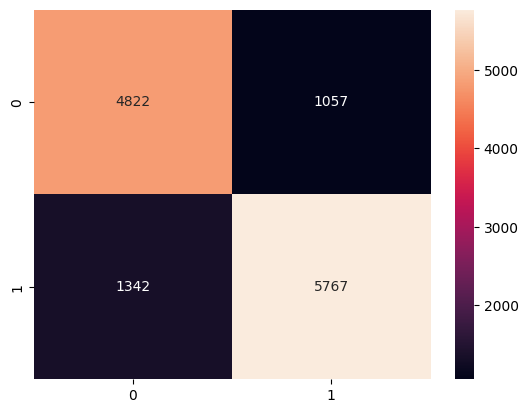

In [99]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_deep.round())) , annot=True, fmt='.0f')

In [100]:
print(classification_report(y_test, y_pred_deep.round()))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5879
           1       0.85      0.81      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.81      0.82      0.81     12988
weighted avg       0.82      0.82      0.82     12988



Notes:

ANN using tensorflow the results are not much different. This means to improve the model only by training with even better data. Maybe retraining can be done again after getting new data from the production environment.

In [ ]:
import pickle
pickle.dump(model, open('deep.pkl','wb'))